<a href="https://colab.research.google.com/github/chetan7116desai/TEAM_A_data606/blob/main/2_2COVID_Datacleaning%26EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Vaccine Efficiency Prediction using machine learning techniques**


In [ ]:
# Connecting to shared drive
from google.colab import drive
drive.mount('/content/drive')   

Mounted at /content/drive


In [ ]:
# Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from wordcloud import WordCloud 
import warnings
warnings.filterwarnings(action='ignore')
import re
import numpy as np

In [ ]:
df_vax = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_vax.csv")
df_vax.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_symp = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_sym.csv")
df_symp.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df_data = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/data_pat.csv")
df_data.drop('Unnamed: 0',axis=1,inplace=True)

## Common Functions

In [ ]:
def sanitycheck(df):
    """
    Generates Unique count, Null Count and Null Percentage for each column in Dataframe
    
    Parameters
    ---------
    Input pandas dataframe
    
    Output: pandas dataframe
    """
    data = []
    for col in df.columns:
        data.append({'Column' : col,'Unique' : len(df[col].unique()),
                'Null Count' : df[col].isnull().sum(),
                'Null Percentage' : round(df[col].isnull().sum()/df.shape[0]*100,2) })
    return pd.DataFrame(data).sort_values(['Null Percentage'],ascending=False)

In [ ]:
def binaryconvert(df,cols):
    """
    Converts categorical value with Y and N to binary 0's and 1's    
    Parameters
    ---------
    Input pandas dataframe and column names
    
    Output: pandas dataframe
    """
    for col in cols:
      df[col] = np.where(df[col] == "Y", 1, 0)


In [ ]:
def regex_clean(text):
            
    # Remove special terms    
    text = re.sub(pattern='#x200B;|&lt;|&gt;|&amp;|_', repl=' ', string=str(text))  
    
    # Remove all digits
    text = re.sub(pattern=r'\d+', repl=' ', string=str(text))
    #text = re.sub(pattern=r'\w*\d\w*', repl='', string=text)
    
    # Remove non-english symbols
    text = re.sub(pattern=r'[^a-zA-Z1-9]+', repl=' ', string=str(text))
  
    return text

## Covid Vaccine Data Exploration

### Covid VAERS vaccine data

In [ ]:
# Filtering only COVID 19 Vaccine info
df_covid_vax = df_vax[df_vax['VAX_TYPE'] == 'COVID19']
print(df_covid_vax["VAERS_ID"].nunique())

1088560


In [ ]:
vaers_covid = df_data.merge(df_covid_vax, on='VAERS_ID',how='right').merge(df_symp, on='VAERS_ID',how='inner')


In [ ]:
print(vaers_covid["VAERS_ID"].nunique())

1088557


In [ ]:
vaers_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1583526 entries, 0 to 1583525
Data columns (total 52 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   VAERS_ID         1583526 non-null  int64  
 1   RECVDATE         1583526 non-null  object 
 2   STATE            1467623 non-null  object 
 3   AGE_YRS          1207119 non-null  float64
 4   CAGE_YR          880171 non-null   float64
 5   CAGE_MO          1638 non-null     float64
 6   SEX              1583526 non-null  object 
 7   RPT_DATE         777 non-null      object 
 8   SYMPTOM_TEXT     1583196 non-null  object 
 9   DIED             39315 non-null    object 
 10  DATEDIED         33788 non-null    object 
 11  L_THREAT         53254 non-null    object 
 12  ER_VISIT         131 non-null      object 
 13  HOSPITAL         255289 non-null   object 
 14  HOSPDAYS         111275 non-null   float64
 15  X_STAY           2786 non-null     object 
 16  DISABLE          7

In [ ]:
#covid data features and observations.
vaers_covid.shape

(1583526, 52)

In [ ]:
vaers_covid.describe()

,VAERS_ID,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS,SYMPTOMVERSION1,SYMPTOMVERSION2,SYMPTOMVERSION3,SYMPTOMVERSION4,SYMPTOMVERSION5
count,1.583526e+06,1.207119e+06,880171.000000,1638.000000,111275.000000,1.382911e+06,1.583526e+06,1.583526e+06,1.272959e+06,1.006840e+06,772752.000000,596613.000000
mean,1.499836e+06,4.921773e+01,49.542508,0.068254,15.133759,2.888564e+01,1.999462e+00,2.393983e+01,2.393873e+01,2.393754e+01,23.936352,23.937152
std,3.356173e+05,1.892744e+01,19.169341,0.166147,947.921490,4.940263e+02,2.318945e-02,2.786506e-01,2.804626e-01,2.825389e-01,0.284017,0.284995
min,9.024180e+05,8.000000e-02,0.000000,0.000000,1.000000,0.000000e+00,1.000000e+00,2.310000e+01,2.310000e+01,2.310000e+01,23.100000,23.100000
25%,1.211612e+06,3.500000e+01,35.000000,0.000000,2.000000,0.000000e+00,2.000000e+00,2.400000e+01,2.400000e+01,2.400000e+01,24.000000,24.000000
50%,1.501258e+06,4.900000e+01,50.000000,0.000000,4.000000,1.000000e+00,2.000000e+00,2.400000e+01,2.400000e+01,2.400000e+01,24.000000,24.000000
75%,1.792114e+06,6.400000e+01,64.000000,0.000000,7.000000,7.000000e+00,2.000000e+00,2.410000e+01,2.410000e+01,2.410000e+01,24.100000,24.100000
max,2.071608e+06,1.190000e+02,120.000000,1.000000,99999.000000,4.422400e+04,2.000000e+00,2.410000e+01,2.410000e+01,2.410000e+01,24.100000,24.100000


In [ ]:
vaers_covid.duplicated().value_counts()


False    1581483
True        2043
dtype: int64

In [ ]:
# Check if duplicates have been dropped
vaers_covid.drop_duplicates(inplace=True)
vaers_covid.duplicated().value_counts()


False    1581483
dtype: int64

In [ ]:
vaers_covid['FORM_VERS'].value_counts()

2    1580634
1        849
Name: FORM_VERS, dtype: int64

In [ ]:
vaers_covid.drop(vaers_covid[vaers_covid['FORM_VERS'] != 2].index, inplace=True)
vaers_covid['FORM_VERS'].value_counts()

2    1580634
Name: FORM_VERS, dtype: int64

In [ ]:
vaers_covid.drop(columns=['RPT_DATE', 'ER_VISIT', 'V_FUNDBY'], inplace=True)
# Drop the version columns as we not required
vaers_covid.drop(columns=['SYMPTOMVERSION1', 'SYMPTOMVERSION2', 'SYMPTOMVERSION3', 
                 'SYMPTOMVERSION4', 'SYMPTOMVERSION5'], inplace=True)

In [ ]:
sanitycheck(vaers_covid)

,Column,Unique,Null Count,Null Percentage
28,BIRTH_DEFECT,2,1579216,99.91
5,CAGE_MO,12,1578998,99.90
13,X_STAY,2,1577850,99.82
9,DATEDIED,420,1546966,97.87
8,DIED,2,1541448,97.52
10,L_THREAT,2,1527489,96.64
24,PRIOR_VAX,33160,1520839,96.22
14,DISABLE,2,1503737,95.14
12,HOSPDAYS,116,1469591,92.97
30,ER_ED_VISIT,2,1346706,85.20


In [ ]:
vaers_covid = vaers_covid.drop(columns =['VAX_LOT', 'VAX_DOSE_SERIES', 'VAX_ROUTE', 'VAX_SITE','RECVDATE','CAGE_YR','CAGE_MO',
                                         'CAGE_YR','CAGE_MO',
               'V_ADMINBY','FORM_VERS','LAB_DATA','TODAYS_DATE',
               'SPLTTYPE','PRIOR_VAX','OFC_VISIT'])


In [ ]:
vaers_covid.AGE_YRS.isna().value_counts()

False    1204346
True      376288
Name: AGE_YRS, dtype: int64

In [ ]:
# Drop all rows that have missing values
vaers_covid = vaers_covid.dropna(subset = ['AGE_YRS'])

In [ ]:
vaers_covid[vaers_covid['SYMPTOM_TEXT'].isnull()].head()

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,ER_ED_VISIT,ALLERGIES,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5
47727,945204,WA,23.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Unevaluable event,NaN,NaN,NaN,NaN
52792,950337,GA,70.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Unevaluable event,NaN,NaN,NaN,NaN
52831,950370,GA,70.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Unevaluable event,NaN,NaN,NaN,NaN
59306,955992,AZ,73.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),No adverse event,NaN,NaN,NaN,NaN
59307,955992,AZ,73.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),No adverse event,NaN,NaN,NaN,NaN


In [ ]:
vaers_covid = vaers_covid.dropna(subset = ['SYMPTOM_TEXT'])


In [ ]:
#Converting the Date Columns to Date Datatype
vaers_covid['DATEDIED'] =  pd.to_datetime(vaers_covid['DATEDIED'])
vaers_covid['VAX_DATE'] =  pd.to_datetime(vaers_covid['VAX_DATE'])
vaers_covid['ONSET_DATE'] =  pd.to_datetime(vaers_covid['ONSET_DATE'])

In [ ]:
# Converting SEX columns to binary
vaers_covid['SEX'] = vaers_covid['SEX'].replace('U', '2')
vaers_covid['SEX'] = vaers_covid['SEX'].replace('F', '0')
vaers_covid['SEX'] = vaers_covid['SEX'].replace('M', '1')

vaers_covid['RECOVD'] = vaers_covid['RECOVD'].fillna(2)
vaers_covid['RECOVD'] = vaers_covid['RECOVD'].replace('U', 2)
vaers_covid['RECOVD'] = vaers_covid['RECOVD'].replace('N', 0)
vaers_covid['RECOVD'] = vaers_covid['RECOVD'].replace('Y', 1)

vaers_covid['HOSPDAYS'] = vaers_covid['HOSPDAYS'].fillna(0)
vaers_covid.STATE = vaers_covid.STATE.str.upper()

In [ ]:
cols =  ['L_THREAT','DIED','HOSPITAL','DISABLE','BIRTH_DEFECT','X_STAY','ER_ED_VISIT']
binaryconvert(vaers_covid,cols)

In [ ]:
vaers_covid['SYMPTOM_TEXT'] = vaers_covid['SYMPTOM_TEXT'].apply(regex_clean)
vaers_covid['OTHER_MEDS'] = vaers_covid['OTHER_MEDS'].apply(regex_clean)
vaers_covid['HISTORY'] = vaers_covid['HISTORY'].apply(regex_clean)
vaers_covid['ALLERGIES'] = vaers_covid['ALLERGIES'].apply(regex_clean)
vaers_covid[['SYMPTOM_TEXT', 'OTHER_MEDS', 'HISTORY', 'ALLERGIES']].head()

,SYMPTOM_TEXT,OTHER_MEDS,HISTORY,ALLERGIES
0,Patient experienced mild numbness traveling fr...,latex,none,none
1,C O Headache,nan,nan,nan
2,felt warm hot and face and ears were red and f...,Novasc Hydrochlorothiazide synthroid lisinopri...,Hypertension sleep apnea hypothyroidism,Contrast Dye IV contrast shellfish strawberry
3,within minutes progressive light headedness le...,none,none,none
4,Pt felt wave come over body starting in head a...,Lisinopril HCTZ lipitor amyitrypline lexapro v...,hypertension fibromyalgia,Biaxin


In [ ]:
# Remove null values from vax_date and onset_date
vaers_covid = vaers_covid[vaers_covid['VAX_DATE'].notna()]
vaers_covid = vaers_covid[vaers_covid['ONSET_DATE'].notna()]

# Calculate 'num_days'
vaers_covid['NUMDAYS'] = (vaers_covid['ONSET_DATE'] - vaers_covid['VAX_DATE']).dt.days

In [ ]:
# Interval between vaccination date and onset date should be positive, otherwise AE occured prior to vaccination
vaers_covid = vaers_covid[vaers_covid['NUMDAYS'] >= 0]
vaers_covid['NUMDAYS'] = vaers_covid['NUMDAYS'].astype(int)

In [ ]:
## keeping only vaccine data which are after jan 2021
vaers_covid= vaers_covid[vaers_covid['VAX_DATE'] >= '2021-01-01']

In [ ]:
serious = vaers_covid[['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']].copy()

In [ ]:
def serious_criteria(row):
    row['serious'] = 0
    for col in ['DIED', 'L_THREAT', 'HOSPITAL', 'X_STAY', 'DISABLE', 'BIRTH_DEFECT']:
        if row[col] == 1:
            row['serious'] = 1
            
    return row

#     if row['died'] == 'Y' or row['l_threat'] == 'Y' or row['hospital'] == 'Y' or row['x_stay'] == 'Y' or row['disable'] == 'Y' or row['birth_defect'] == 'Y':
#         return 1
#     else:
#         return 0


vaers_covid = vaers_covid.apply(serious_criteria, axis=1)


In [ ]:
vaers_covid['serious'].value_counts()

0    867258
1    215078
Name: serious, dtype: int64

In [ ]:
import pandas as pd

fields = ['MedDRA Code', 'PT Name','SOC Name']

meDRA = pd.read_excel('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/meddra-important-medical-event-terms-list-version-250_en.xlsx', usecols=fields)

In [ ]:
meDRA.head()

,MedDRA Code,PT Name,SOC Name
0,10086470,Erythroid dysplasia,Blood and lymphatic system disorders
1,10087400,Paraneoplastic eosinophilia,Blood and lymphatic system disorders
2,10086663,Sarcoidosis of lymph node,Blood and lymphatic system disorders
3,10087091,Warm autoimmune haemolytic anaemia,Blood and lymphatic system disorders
4,10087237,Atrial standstill,Cardiac disorders


In [ ]:
list_of_names = meDRA['PT Name'].to_list()
list_of_names = [i.lower() for i in list_of_names]
print('List of Names: ', list_of_names)
print('Type of listOfNames: ', type(list_of_names))

List of Names:  ['erythroid dysplasia', 'paraneoplastic eosinophilia', 'sarcoidosis of lymph node', 'warm autoimmune haemolytic anaemia', 'atrial standstill', 'chronic myocarditis', 'fascicular block', 'myopericarditis', 'pacing induced cardiomyopathy', 'aphallia', 'arhinencephaly', 'congenital female genital tract fistula', 'congenital female reproductive tract disorder', 'congenital musculoskeletal disorder', 'congenital musculoskeletal disorder of head and neck', 'congenital musculoskeletal disorder of limbs', 'congenital musculoskeletal disorder of skull', 'congenital musculoskeletal disorder of spine', 'congenital musculoskeletal disorder of trunk', 'congenital parvovirus b19 infection', 'congenital subglottic stenosis', 'congenital vena cava stenosis', 'congenital viral infection', 'congenital vocal cord paralysis', 'osteochondrodysplasia', 'torch infection', 'central hypothyroidism', 'acquired hypertrophy of the retinal pigment epithelium', 'central serous chorioretinopathy', 'i

In [ ]:
%%time
# Define a funtion that checks each row of the dataframe and see if symptom 1-5 is in the ime list
def ime(row):
    
    row['ime'] = 0
    
    for col in ['SYMPTOM1', 'SYMPTOM2', 'SYMPTOM3', 'SYMPTOM4', 'SYMPTOM5']:
        
        if str(row[col]).lower() in list_of_names:
            
            row['ime'] = 1
    
    return row

# apply the function to the dataframe and check the relevant columns
vaers_covid = vaers_covid.apply(ime, axis=1)
# df[['symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'ime']]

CPU times: user 27min 4s, sys: 13 s, total: 27min 17s
Wall time: 27min 11s


In [ ]:
vaers_covid['ime'].value_counts()

0    891128
1    191208
Name: ime, dtype: int64

In [ ]:
vaers_covid['serious'] = vaers_covid['serious'] + vaers_covid['ime']
vaers_covid['serious'] = vaers_covid['serious'].apply(lambda x: 0 if x == 0 else 1)

In [ ]:
vaers_covid.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/covid_clean.csv*', index=False)

In [ ]:
vaers_covid['serious'].value_counts()

0    769379
1    312957
Name: serious, dtype: int64

## EDA

In [ ]:
vaers_covid = pd.read_csv("/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/covid_clean.csv")

In [ ]:
vaers_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1082336 entries, 0 to 1082335
Data columns (total 32 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   VAERS_ID      1082336 non-null  int64  
 1   STATE         1015346 non-null  object 
 2   AGE_YRS       1082336 non-null  float64
 3   SEX           1082336 non-null  int64  
 4   SYMPTOM_TEXT  1082336 non-null  object 
 5   DIED          1082336 non-null  int64  
 6   DATEDIED      23268 non-null    object 
 7   L_THREAT      1082336 non-null  int64  
 8   HOSPITAL      1082336 non-null  int64  
 9   HOSPDAYS      1082336 non-null  float64
 10  X_STAY        1082336 non-null  int64  
 11  DISABLE       1082336 non-null  int64  
 12  RECOVD        1082336 non-null  int64  
 13  VAX_DATE      1082336 non-null  object 
 14  ONSET_DATE    1082336 non-null  object 
 15  NUMDAYS       1082336 non-null  int64  
 16  OTHER_MEDS    660334 non-null   object 
 17  CUR_ILL       503365 non-nu

In [ ]:
vaers_covid.head()

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,serious,ime
0,916661,FL,59.0,0,headache chills right pain,0,NaN,0,0,0.0,...,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Chills,Headache,Pain,NaN,NaN,0,0
1,916904,CA,49.0,1,Pt symptoms included swelling in the eyes ches...,0,NaN,0,0,0.0,...,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Chest discomfort,Eye swelling,Hypertension,Sensation of foreign body,Tachycardia,0,0
2,916904,CA,49.0,1,Pt symptoms included swelling in the eyes ches...,0,NaN,0,0,0.0,...,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Wheezing,NaN,NaN,NaN,NaN,0,0
3,916969,CO,88.0,0,Anaphylactic like reaction started with dizzin...,0,NaN,0,0,0.0,...,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Anaphylactoid reaction,Consciousness fluctuating,Dizziness,Heart rate increased,Hyperhidrosis,1,1
4,916969,CO,88.0,0,Anaphylactic like reaction started with dizzin...,0,NaN,0,0,0.0,...,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Wheezing,NaN,NaN,NaN,NaN,0,0


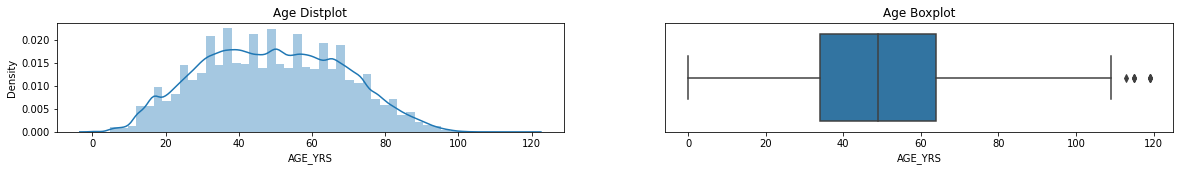

In [ ]:
from scipy.stats import probplot,skew
fig, axes = plt.subplots(1, 2, figsize=(20,2))
sns.distplot(vaers_covid['AGE_YRS'],kde=True, ax=axes[0])
sns.boxplot(vaers_covid['AGE_YRS'], ax=axes[1])
axes[1].set_yticklabels([])
axes[1].set_yticks([])
axes[0].set_title('Age Distplot')
axes[1].set_title('Age Boxplot')
plt.show()

In [ ]:
age_covid = vaers_covid[vaers_covid['AGE_YRS'] <18]

In [ ]:
age_covid

,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,serious,ime
258,918673,NaN,0.33,0,Initial reaction sore arm off balance tingling...,0,NaN,0,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Balance disorder,Pain,Pain in extremity,Paraesthesia,NaN,0,0
262,918683,NaN,0.50,0,Persistant symptoms of perception off and off ...,0,NaN,0,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Balance disorder,Illusion,NaN,NaN,NaN,0,0
263,918691,NaN,0.58,1,tingling in left fingers,0,NaN,0,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Paraesthesia,NaN,NaN,NaN,NaN,0,0
267,918824,NaN,0.25,0,Sore jaw across the bottom around noon seeing ...,0,NaN,0,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Pain in jaw,Photopsia,NaN,NaN,NaN,0,0
342,919233,VT,15.00,1,Covid vaccine was administered to individual y...,0,NaN,0,0,0.0,...,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),No adverse event,Product administered to patient of inappropria...,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082176,2070361,FR,14.00,1,High temperature Swelling arm swollen arm swol...,0,NaN,0,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Pain in extremity,Peripheral swelling,Pyrexia,SARS-CoV-2 test,NaN,0,0
1082182,2070368,FR,12.00,1,Swollen lymph nodes in armpit under arm Sore a...,0,NaN,0,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Inappropriate schedule of product administration,Lymph node pain,Lymphadenopathy,SARS-CoV-2 test,NaN,0,0
1082187,2070388,FR,12.00,0,tight chest tight chested Watering eyes eyes e...,0,NaN,1,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Dyspnoea,Heart rate,Inappropriate schedule of product administration,Lacrimation increased,1,0
1082188,2070388,FR,12.00,0,tight chest tight chested Watering eyes eyes e...,0,NaN,1,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),SARS-CoV-2 test,NaN,NaN,NaN,NaN,1,0


In [ ]:
vaers_covid.drop(vaers_covid[(vaers_covid['SYMPTOM1'] == 'Product administered to patient of inappropriate age')|
           (vaers_covid['SYMPTOM2'] == 'Product administered to patient of inappropriate age')| 
           (vaers_covid['SYMPTOM3'] == 'Product administered to patient of inappropriate age')| 
           (vaers_covid['SYMPTOM4'] == 'Product administered to patient of inappropriate age')| 
           (vaers_covid['SYMPTOM5'] == 'Product administered to patient of inappropriate age')].index, inplace=True)

In [ ]:
vaers_covid.drop(vaers_covid[(vaers_covid['SYMPTOM1'] == 'No adverse event')|
           (vaers_covid['SYMPTOM2'] == 'No adverse event')| 
           (vaers_covid['SYMPTOM3'] == 'No adverse event')| 
           (vaers_covid['SYMPTOM4'] == 'No adverse event')| 
           (vaers_covid['SYMPTOM5'] == 'No adverse event')].index, inplace=True)



In [ ]:
vaers_covid.drop(vaers_covid[(vaers_covid['SYMPTOM1'] == 'Inappropriate schedule of product administration')|
           (vaers_covid['SYMPTOM2'] == 'Inappropriate schedule of product administration')| 
           (vaers_covid['SYMPTOM3'] == 'Inappropriate schedule of product administration')| 
           (vaers_covid['SYMPTOM4'] == 'Inappropriate schedule of product administration')| 
           (vaers_covid['SYMPTOM5'] == 'Inappropriate schedule of product administration')].index, inplace=True)

In [ ]:
vaers_covid.drop(vaers_covid[(vaers_covid['SYMPTOM1'] == 'SARS-CoV-2 test negative')|
           (vaers_covid['SYMPTOM2'] == 'SARS-CoV-2 test negative')| 
           (vaers_covid['SYMPTOM3'] == 'SARS-CoV-2 test negative')| 
           (vaers_covid['SYMPTOM4'] == 'SARS-CoV-2 test negative')| 
           (vaers_covid['SYMPTOM5'] == 'SARS-CoV-2 test negative')].index, inplace=True)

In [ ]:
vaers_covid[vaers_covid['AGE_YRS'] >100]


,VAERS_ID,STATE,AGE_YRS,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,HOSPITAL,HOSPDAYS,...,VAX_TYPE,VAX_MANU,VAX_NAME,SYMPTOM1,SYMPTOM2,SYMPTOM3,SYMPTOM4,SYMPTOM5,serious,ime
304,919052,TN,103.0,0,rash itching,0,NaN,0,0,0.0,...,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Pruritus,Rash,NaN,NaN,NaN,0,0
2029,924112,WI,102.0,0,Swelling to right side of neck and lymph nodes...,0,NaN,0,0,0.0,...,COVID19,MODERNA,COVID19 (COVID19 (MODERNA)),Lymphadenopathy,Swelling,NaN,NaN,NaN,0,0
3763,926885,OR,101.0,0,Resident reported feeling nauseous and wanted ...,0,NaN,0,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Tremor,NaN,NaN,NaN,NaN,0,0
4464,928219,VA,115.0,0,Nausea diarrhea tiredness aches tachycardia,0,NaN,0,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Diarrhoea,Fatigue,Nausea,Pain,Tachycardia,0,0
18983,946231,MA,101.0,0,Left upper extremity red warm swollen,0,NaN,0,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Erythema,Feeling hot,Swelling,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047044,1945221,FR,101.0,1,pericardial effusion myocardial infarction ret...,0,NaN,0,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Chest discomfort,Computerised tomogram,Myocardial infarction,Neoplasm,Oropharyngeal pain,1,1
1047045,1945221,FR,101.0,1,pericardial effusion myocardial infarction ret...,0,NaN,0,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Pericardial effusion,NaN,NaN,NaN,NaN,1,1
1052593,1965033,FR,104.0,1,This is a spontaneous report received from a c...,1,2021-11-05,0,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),Death,Immunisation,Lower respiratory tract infection,Off label use,Product use issue,1,1
1052594,1965033,FR,104.0,1,This is a spontaneous report received from a c...,1,2021-11-05,0,0,0.0,...,COVID19,PFIZER\BIONTECH,COVID19 (COVID19 (PFIZER-BIONTECH)),SARS-CoV-2 test,NaN,NaN,NaN,NaN,1,0


In [ ]:
df = vaers_covid[vaers_covid['AGE_YRS'] >18]

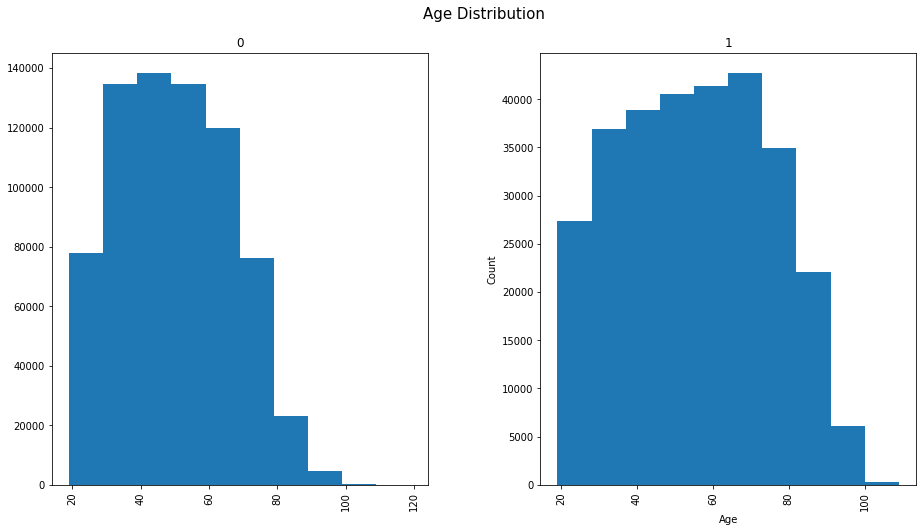

In [ ]:
# Distribution of adverse event severity based on age
df['AGE_YRS'].hist(by=df['serious'], figsize=(15,8))
plt.xlabel('Age')
plt.ylabel('Count')
plt.suptitle('Age Distribution', fontsize=15);


In [ ]:

plt.figure(figsize=(15,8))
labels = df['VAX_MANU'].value_counts().index
values = df['VAX_MANU'].value_counts().values

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

<Figure size 1080x576 with 0 Axes>

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = df['VAX_MANU'].value_counts().index
values1 = df[df['serious'] == 1].VAX_MANU.value_counts().values
values2 = df[df['serious'] == 0].VAX_MANU.value_counts().values
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values= values1, name="Serious case"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values2, name="Non Serious case"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Seriousness of Vaccine Manufacturer",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Serious', x=0.18, y=0.5, font_size=10, showarrow=False),
                 dict(text='Non Serious', x=0.82, y=0.5, font_size=10, showarrow=False)])
fig.show()

In [ ]:
## As unknown manufacturer are negligible 
df = df[~df['VAX_MANU'].isin(['UNKNOWN MANUFACTURER'])]  

([<matplotlib.axis.XTick at 0x7fbb7e0c1910>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male'), Text(0, 0, 'Unknown')])

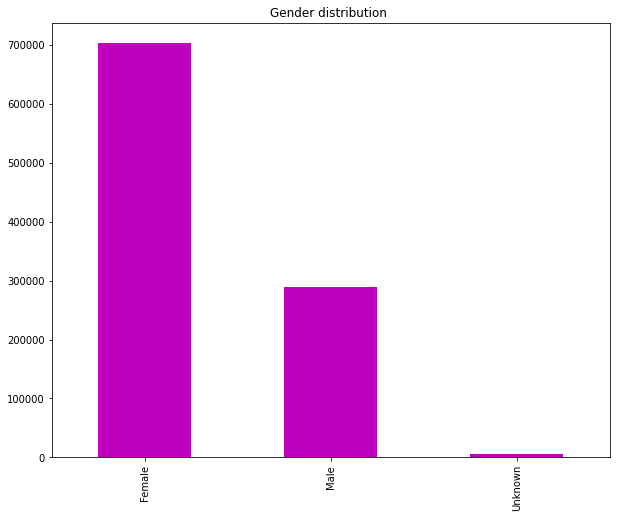

In [ ]:
plt.figure(figsize=(10,8))
route = df['SEX'].value_counts()
route.plot(kind='bar', title='Gender distribution ',color="m")
values = ['Female', 'Male', 'Unknown'] 
plt.xticks(route.index,values)

In [ ]:
gender_serious = (df.groupby(['SEX', 'serious']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count'))

In [ ]:
gender_serious.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   SEX      6 non-null      int64
 1   serious  6 non-null      int64
 2   count    6 non-null      int64
dtypes: int64(3)
memory usage: 272.0 bytes


In [ ]:
map_dict = {1: "Male", 0 : "Female", 2 :"Unknown"}
map_dict_s = {1: "Serious", 0 : "Non Serious"}
gender_serious["SEX"] = gender_serious["SEX"].map(map_dict)
gender_serious["serious"] = gender_serious["serious"].map(map_dict_s)
gender_serious

,SEX,serious,count
0,Female,Non Serious,531537
1,Male,Non Serious,171658
2,Female,Serious,171092
3,Male,Serious,117575
4,Unknown,Non Serious,4746
5,Unknown,Serious,1533


In [ ]:
import plotly.express as px

fig = px.bar(gender_serious, x="SEX", y="count", color="serious", title="Gender seriousness comparison")
fig.show()

In [ ]:
# drop all rows with unkown SEX
df = df[df['SEX'] != 2]

In [ ]:
age_serious = df[['AGE_YRS', 'serious']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}

age_serious["serious"] = age_serious["serious"].map(map_dict_s)

age_serious

,AGE_YRS,serious
0,59.0,Non Serious
1,49.0,Non Serious
2,49.0,Non Serious
3,88.0,Serious
4,88.0,Non Serious
...,...,...
1082331,44.0,Non Serious
1082332,30.0,Serious
1082333,51.0,Non Serious
1082334,51.0,Serious


In [ ]:
bins = [10, 20, 30, 40, 50, 60,70,80,90,120]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','>90']
categories = pd.cut(age_serious['AGE_YRS'], bins, labels=group)

age_serious['category'] = categories

In [ ]:
age_serious


,AGE_YRS,serious,category
0,59.0,Non Serious,51-60
1,49.0,Non Serious,41-50
2,49.0,Non Serious,41-50
3,88.0,Serious,81-90
4,88.0,Non Serious,81-90
...,...,...,...
1082331,44.0,Non Serious,41-50
1082332,30.0,Serious,21-30
1082333,51.0,Non Serious,51-60
1082334,51.0,Serious,51-60


In [ ]:
age_serious_group = (age_serious.groupby(['category', 'serious']).size() 
   .sort_values(ascending=False) 
   .reset_index(name='count'))

In [ ]:
fig = px.bar(age_serious_group, x="category", y="count", color="serious", text_auto=True)
fig.show()

In [ ]:
age_serious_sex = df[['AGE_YRS','SEX', 'serious']]
map_dict_s = {1: "Serious", 0 : "Non Serious"}
map_dict = {1: "Male", 0 : "Female"}
age_serious_sex["serious"] = age_serious_sex["serious"].map(map_dict_s)
age_serious_sex["SEX"] = age_serious_sex["SEX"].map(map_dict)

bins = [10, 20, 30, 40, 50, 60,70,80,90,120]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','>90']
categories = pd.cut(age_serious_sex['AGE_YRS'], bins, labels=group)

age_serious_sex['category'] = categories
age_serious_sex

,AGE_YRS,SEX,serious,category
0,59.0,Female,Non Serious,51-60
1,49.0,Male,Non Serious,41-50
2,49.0,Male,Non Serious,41-50
3,88.0,Female,Serious,81-90
4,88.0,Female,Non Serious,81-90
...,...,...,...,...
1082331,44.0,Female,Non Serious,41-50
1082332,30.0,Male,Serious,21-30
1082333,51.0,Male,Non Serious,51-60
1082334,51.0,Male,Serious,51-60


In [ ]:
age_serious_sex1 = (age_serious_sex.groupby(['category','SEX', 'serious']).size()  
   .reset_index(name='count'))

In [ ]:
#https://medium.com/@moritzkoerber/how-to-plot-a-grouped-stacked-bar-chart-in-plotly-df1685b83460
fig = go.Figure()

fig.update_layout(
    template="plotly_dark",
    xaxis=dict(title_text="Age category and Sex"),
    yaxis=dict(title_text="count"),
    barmode="stack",
)

colors = ["#2A66DE", "#FFC32B"]
for r, c in zip(age_serious_sex1.serious.unique(), colors):
    plot_df = age_serious_sex1[age_serious_sex1.serious == r]
    fig.add_trace(
        go.Bar(x=[plot_df.category, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [ ]:
subset_df = df[['AGE_YRS','SEX','DIED','VAX_MANU']]
map_dict_d = {1: "Death", 0 : "No Death"}
map_dict = {1: "Male", 0 : "Female"}
subset_df["SEX"] = subset_df["SEX"].map(map_dict)
subset_df["DIED"] = subset_df["DIED"].map(map_dict_d)

bins = [10, 20, 30, 40, 50, 60,70,80,90,120]
group = ['< 20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90','>90']
categories = pd.cut(subset_df['AGE_YRS'], bins, labels=group)

subset_df['category'] = categories
subset_df

,AGE_YRS,SEX,DIED,VAX_MANU,category
0,59.0,Female,No Death,MODERNA,51-60
1,49.0,Male,No Death,MODERNA,41-50
2,49.0,Male,No Death,MODERNA,41-50
3,88.0,Female,No Death,MODERNA,81-90
4,88.0,Female,No Death,MODERNA,81-90
...,...,...,...,...,...
1082331,44.0,Female,No Death,MODERNA,41-50
1082332,30.0,Male,No Death,MODERNA,21-30
1082333,51.0,Male,No Death,MODERNA,51-60
1082334,51.0,Male,No Death,MODERNA,51-60


In [ ]:
subset_df1 = (subset_df.groupby(['category','SEX', 'DIED']).size()  
   .reset_index(name='count'))

In [ ]:
subset_df1

,category,SEX,DIED,count
0,< 20,Female,Death,25
1,< 20,Female,No Death,9599
2,< 20,Male,Death,16
3,< 20,Male,No Death,5830
4,21-30,Female,Death,150
5,21-30,Female,No Death,87628
6,21-30,Male,Death,219
7,21-30,Male,No Death,36062
8,31-40,Female,Death,251
9,31-40,Female,No Death,135110


In [ ]:
#https://medium.com/@moritzkoerber/how-to-plot-a-grouped-stacked-bar-chart-in-plotly-df1685b83460
fig = go.Figure()

fig.update_layout(
    template="plotly_dark",
    xaxis=dict(title_text="Death vs Age "),
    yaxis=dict(title_text="count"),
    barmode="stack",
)

colors = ["#2A66DE", "#FFC32B"]
for r, c in zip(subset_df1.DIED.unique(), colors):
    plot_df = subset_df1[subset_df1.DIED == r]
    fig.add_trace(
        go.Bar(x=[plot_df.category, plot_df.SEX], y=plot_df['count'], name=r, marker_color=c),
    )

fig

In [ ]:
sub = subset_df[(subset_df["DIED"] == 'Death')]

In [ ]:
sub = (sub.groupby(['DIED','VAX_MANU']).size()  
   .reset_index(name='count'))

In [ ]:
sub1 =(df.groupby(['VAX_MANU']).size()  
   .reset_index(name='count'))

In [ ]:
sub

,DIED,VAX_MANU,count
0,Death,JANSSEN,1644
1,Death,MODERNA,8893
2,Death,PFIZER\BIONTECH,13084


In [ ]:
sub1 = sub1.rename(columns={"count":"totalcount"})

In [ ]:
sub1= sub1.merge(sub, on = 'VAX_MANU')
sub1.drop('DIED',axis=1,inplace=True)

In [ ]:
sub1

,VAX_MANU,totalcount,count
0,JANSSEN,68384,1644
1,MODERNA,432818,8893
2,PFIZER\BIONTECH,490660,13084


In [ ]:
 sub1['Percentage'] = sub1['count'].div(sub1['totalcount']).round(4)*100

In [ ]:
sub1

,VAX_MANU,totalcount,count,Percentage
0,JANSSEN,68384,1644,2.40
1,MODERNA,432818,8893,2.05
2,PFIZER\BIONTECH,490660,13084,2.67


In [ ]:
subset_death = df[(df["DIED"] == 1)]

In [ ]:
subset_death = subset_death[['VAERS_ID','SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']]

In [ ]:
subset_death['Symptoms'] = subset_death[['SYMPTOM1','SYMPTOM2','SYMPTOM3','SYMPTOM4','SYMPTOM5']].apply(lambda x: ','.join(x.dropna()), axis=1)
#df_symp['Symptoms'] = df_symp['SYMPTOM1'] + "," +  df_symp['SYMPTOM2'] + "," +  df_symp['SYMPTOM3'] + "," +  df_symp['SYMPTOM4'] + "," +  df_symp['SYMPTOM5']
#https://stackoverflow.com/questions/45787782/combine-multiple-columns-in-pandas-excluding-nans

In [ ]:
subset_death = subset_death.groupby(['VAERS_ID','Symptoms']).size().reset_index().rename(columns={0:'count'})
df_covid_all_sym = subset_death.groupby('VAERS_ID')['Symptoms'].apply(','.join).reset_index()
df_covid_sym_id = df_covid_all_sym.assign(Symptoms=df_covid_all_sym.Symptoms.str.split(','))
df_covid_sym1 = df_covid_sym_id.explode('Symptoms')

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

(-0.5, 1364.5, 445.5, -0.5)

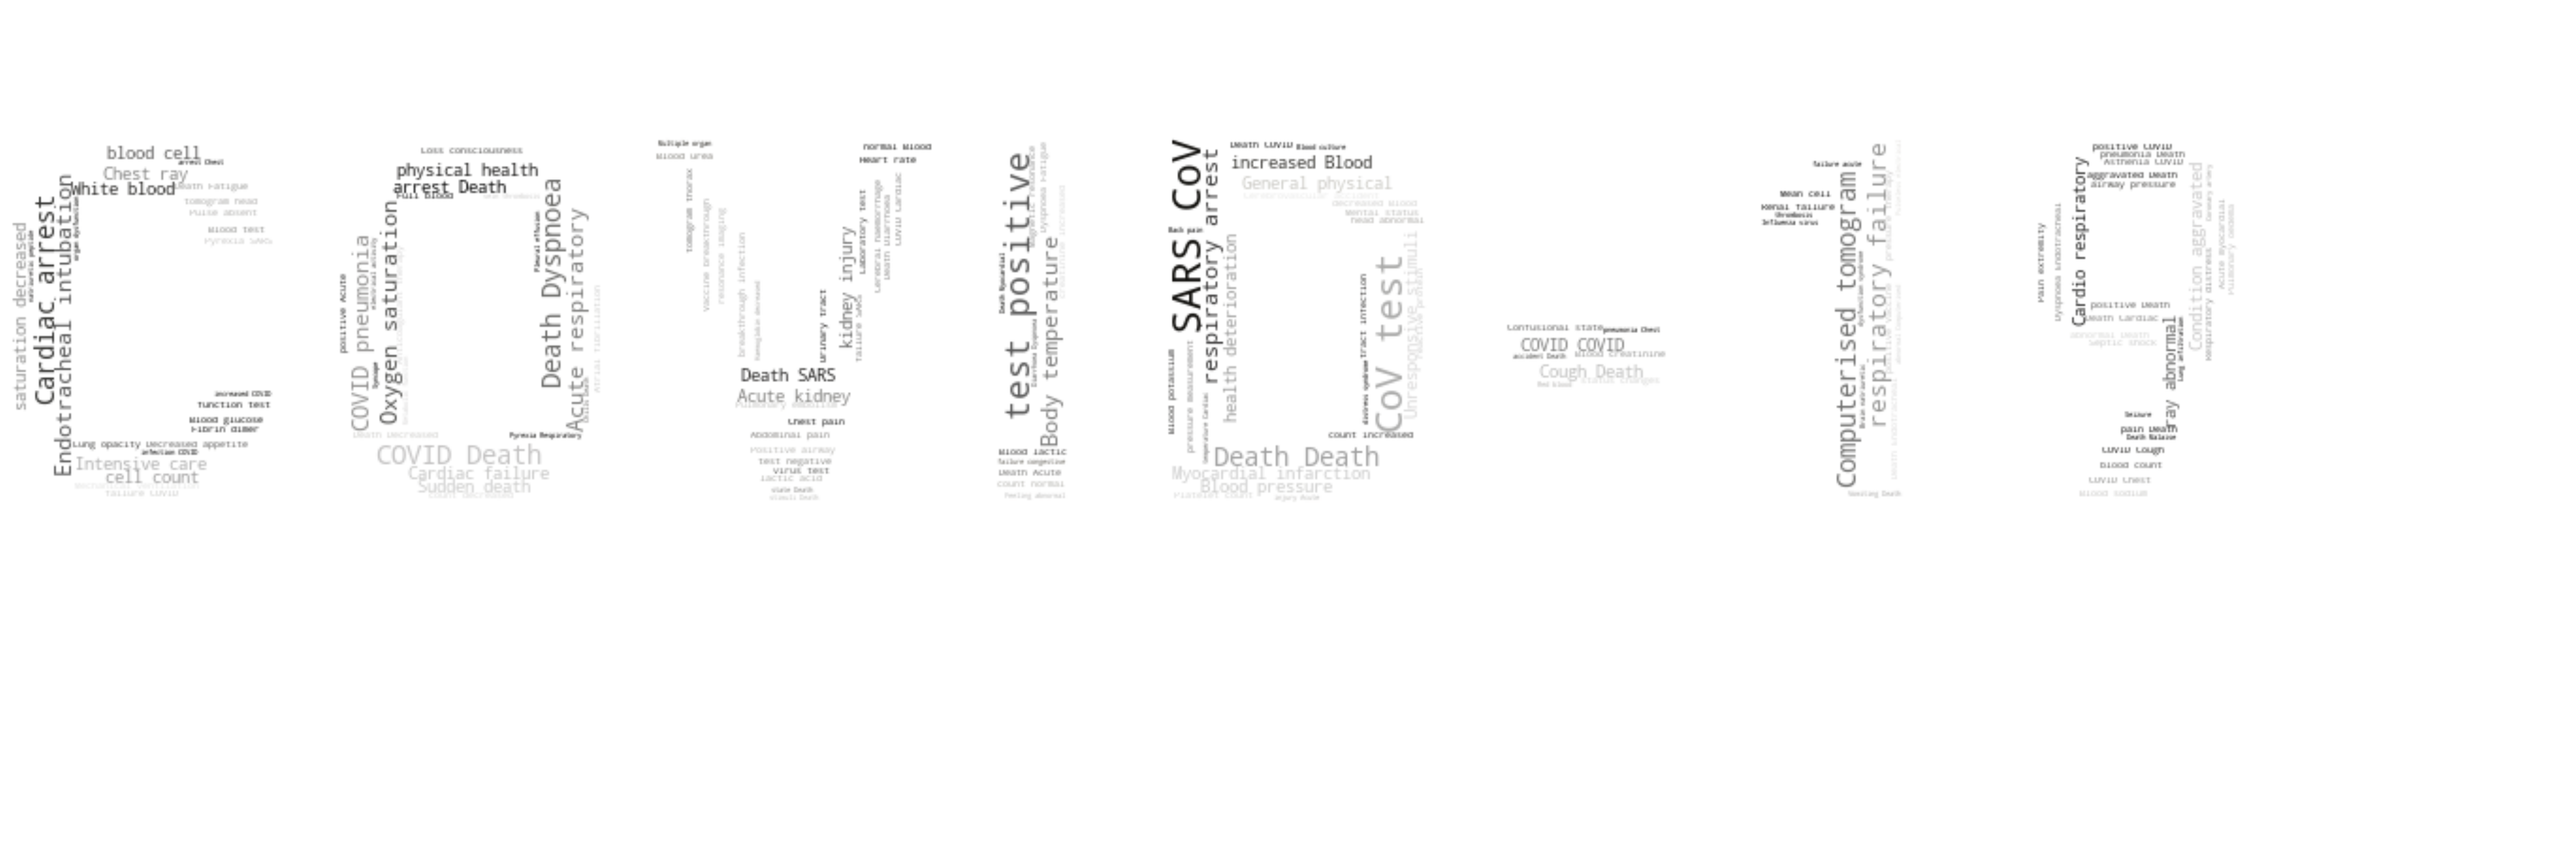

In [ ]:

# Generate a word cloud image
stopwords = set(STOPWORDS)
mask = np.array(Image.open("/content/drive/Shareddrives/Team A 606 Capstone Project/covid-19_logo.png"))
wordcloud = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(' '.join(df_covid_all_sym.Symptoms))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[100,100])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

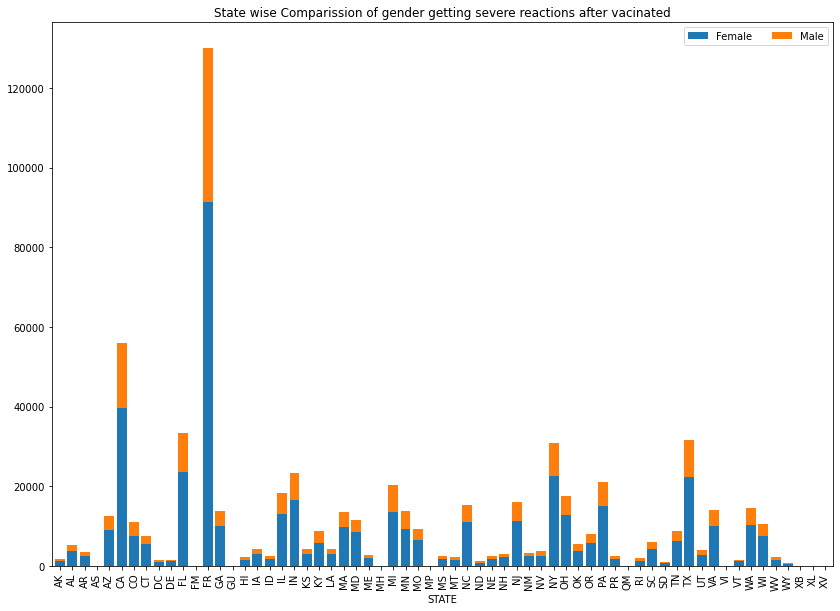

In [ ]:
StateAnalysis = df[['VAERS_ID','STATE','VAX_MANU','SEX','AGE_YRS','DIED','RECOVD','serious']].drop_duplicates()
StateAnalysis = StateAnalysis[StateAnalysis['STATE'] != '']
pd.crosstab(StateAnalysis.STATE,StateAnalysis.SEX).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['Female', 'Male'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of gender getting severe reactions after vacinated', loc ='center')
plt.show()

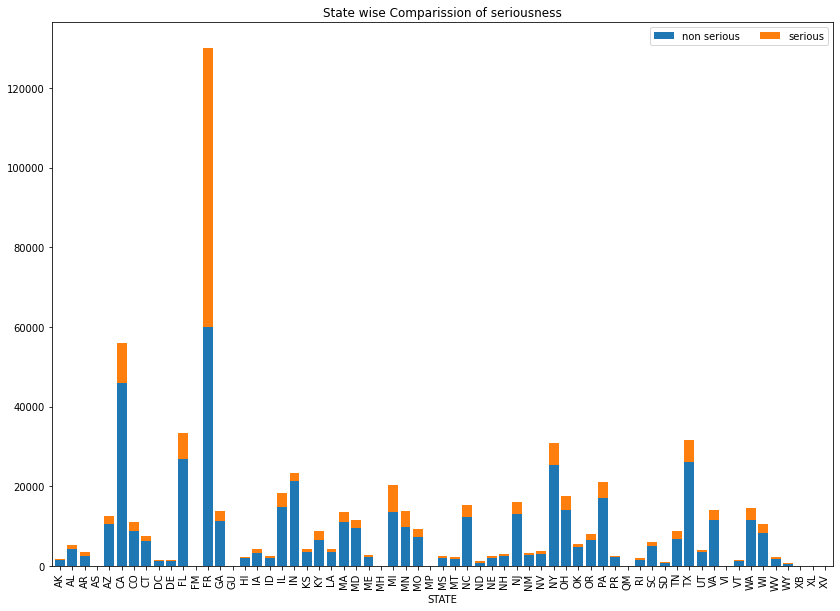

In [ ]:
pd.crosstab(StateAnalysis.STATE,StateAnalysis.serious).plot.bar(stacked=True,width = .8,figsize=(14, 10))
plt.legend(['non serious', 'serious'], loc='upper right', ncol = 3)
plt.title('State wise Comparission of seriousness', loc ='center')
plt.show()

In [ ]:
df_covid_allergies = df.filter(['VAERS_ID','ALLERGIES','serious'], axis=1)
df_covid_allergies.head()

,VAERS_ID,ALLERGIES,serious
0,916661,NaN,0
1,916904,Allergies to bees shellfish and shrimp,0
2,916904,Allergies to bees shellfish and shrimp,0
3,916969,PNC Sulfa,1
4,916969,PNC Sulfa,0


In [ ]:
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].astype(str)

# Remove punctuation
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].str.replace('[^\w\s]','')

# Convert to lower case
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: x.lower())

# Tokenize
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: x.split())
df_covid_allergies.head()

,VAERS_ID,ALLERGIES,serious
0,916661,[nan],0
1,916904,"[allergies, to, bees, shellfish, and, shrimp]",0
2,916904,"[allergies, to, bees, shellfish, and, shrimp]",0
3,916969,"[pnc, sulfa]",1
4,916969,"[pnc, sulfa]",0


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Stop Words
stop_words=set(stopwords.words("english"))
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: [word for word in x if word not in stop_words])

# Stemming
stemmer = PorterStemmer()
df_covid_allergies['ALLERGIES'] = df_covid_allergies['ALLERGIES'].map(lambda x: [stemmer.stem(y) for y in x])
df_covid_allergies.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,VAERS_ID,ALLERGIES,serious
0,916661,[nan],0
1,916904,"[allergi, bee, shellfish, shrimp]",0
2,916904,"[allergi, bee, shellfish, shrimp]",0
3,916969,"[pnc, sulfa]",1
4,916969,"[pnc, sulfa]",0


In [ ]:
df_covid_allergies.shape

(991862, 3)

In [ ]:
# Unpack lists with Pandas

df_covid_allergies = df_covid_allergies.explode('ALLERGIES', ignore_index=True)

df_covid_allergies.head(10)

,VAERS_ID,ALLERGIES,serious
0,916661,nan,0
1,916904,allergi,0
2,916904,bee,0
3,916904,shellfish,0
4,916904,shrimp,0
5,916904,allergi,0
6,916904,bee,0
7,916904,shellfish,0
8,916904,shrimp,0
9,916969,pnc,1


In [ ]:
# Get the frequency of allergies
df_covid_allergies['ALLERGIES'].value_counts(ascending = False)

nan           476284
none          150890
penicillin     53838
sulfa          46599
allergi        41277
               ...  
lacrilub           1
injectoin          1
lucinipril         1
moderema           1
avadaart           1
Name: ALLERGIES, Length: 23575, dtype: int64

In [ ]:
# Only keep allergies that are in more than 1000 patients
allergies_count = df_covid_allergies.ALLERGIES.value_counts()
df_covid_allergies = df_covid_allergies[df_covid_allergies.ALLERGIES.isin(allergies_count.index[allergies_count.gt(1000)])]
df_covid_allergies['ALLERGIES'].value_counts(ascending = False)

nan           476284
none          150890
penicillin     53838
sulfa          46599
allergi        41277
               ...  
septra          1046
codien          1044
sodium          1024
eye             1014
updat           1011
Name: ALLERGIES, Length: 201, dtype: int64

In [ ]:
# Drop rows with "nan","none","allergi","food","known","unknown","reaction","na","report", "medic"

df_covid_allergies = df_covid_allergies.drop(df_covid_allergies[df_covid_allergies.ALLERGIES.isin(["nan","past","updat","allerg","none","comment","document","drug","sulfa","nka","nkda","allergi","food","known","unknown","reaction","na","report", "medic"])].index)
df_covid_allergies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 605223 entries, 2 to 1929770
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   VAERS_ID   605223 non-null  int64 
 1   ALLERGIES  605223 non-null  object
 2   serious    605223 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 18.5+ MB


In [ ]:
S_ALLERGIES  = df_covid_allergies[df_covid_allergies['serious']== 1]
wordcloud2 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(S_ALLERGIES.ALLERGIES))

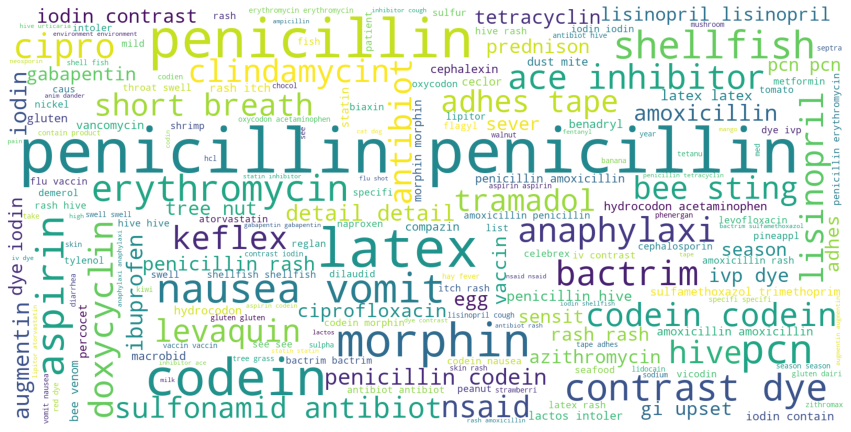

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
NS_ALLERGIES  = df_covid_allergies[df_covid_allergies['serious']== 0]
wordcloud3 = WordCloud(width=1600, height=800, 
            background_color ='white',min_font_size = 10).generate(' '.join(NS_ALLERGIES.ALLERGIES))

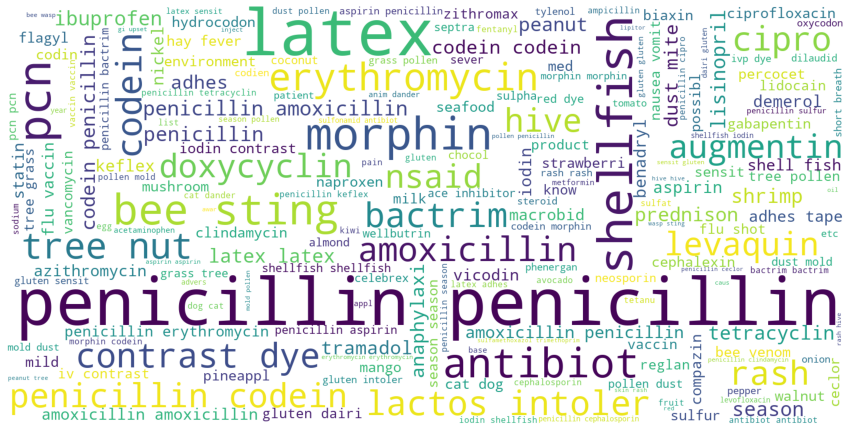

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud3)
plt.axis("off")
plt.show()

In [ ]:
df_ML = df.copy()

In [ ]:
df_ML.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 991862 entries, 0 to 1082335
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   VAERS_ID      991862 non-null  int64  
 1   STATE         931602 non-null  object 
 2   AGE_YRS       991862 non-null  float64
 3   SEX           991862 non-null  int64  
 4   SYMPTOM_TEXT  991862 non-null  object 
 5   DIED          991862 non-null  int64  
 6   DATEDIED      22457 non-null   object 
 7   L_THREAT      991862 non-null  int64  
 8   HOSPITAL      991862 non-null  int64  
 9   HOSPDAYS      991862 non-null  float64
 10  X_STAY        991862 non-null  int64  
 11  DISABLE       991862 non-null  int64  
 12  RECOVD        991862 non-null  int64  
 13  VAX_DATE      991862 non-null  object 
 14  ONSET_DATE    991862 non-null  object 
 15  NUMDAYS       991862 non-null  int64  
 16  OTHER_MEDS    616626 non-null  object 
 17  CUR_ILL       466517 non-null  object 
 18  HIS

In [ ]:
df_knn_ML = df_ML.drop(['STATE','DATEDIED','X_STAY','VAX_DATE','ONSET_DATE','NUMDAYS',
            'ER_ED_VISIT','VAX_TYPE','VAX_NAME','ime'
],axis=1)

In [ ]:
df_ML.drop(['VAERS_ID','STATE','DATEDIED','X_STAY','VAX_DATE','ONSET_DATE','NUMDAYS',
            'ER_ED_VISIT','VAX_TYPE','VAX_NAME','ime'
],axis=1,inplace=True)

In [ ]:
df_ML.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/covid_ml.csv*', index=False)

In [ ]:
df_knn_ML.to_csv('/content/drive/Shareddrives/Team A 606 Capstone Project/Dataset/covid_knn_ml.csv', index=False)